In [1]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd


In [5]:
url = 'https://internshala.com/internships/page-'
list1 = []
for page in range(1,10):
    soup = requests.get(url + str(page) + '-')
    beauti = BeautifulSoup(soup.content,'html.parser')
    content = beauti.find_all('div', class_="internship_meta")
    for item in content:
        title = item.find('a', class_="view_detail_button").text
        company_name = item.find('a', class_="link_display_like_text view_detail_button").text.replace('\n',"")
        location = item.find('a', class_="location_link view_detail_button").text
        stipend = item.find('span',class_="stipend").text
        intern_type = item.find('div',class_="status status-small status-inactive").text
        data = {'title':title,'company_name':company_name,'location':location,'stipend':stipend,'intern_type':intern_type}
    
        list1.append(data)
    
        
    

In [6]:
df = pd.DataFrame(list1)

In [9]:
df

,title,company_name,location,stipend,intern_type
0,Fundraising,Kartavyam ...,Work From Home,Unpaid,Internship
1,Social Entrepreneurship,Hamari Pahchan NGO...,Work From Home,Unpaid,Internship
2,Fundraising,Childo Education R...,Work From Home,"1,000 lump sum + Incentives",Internship
3,Fundraising,Jankalyan Multipur...,Work From Home,Unpaid,Internship
4,Campus Ambassador,ATBC Technologies ...,Work From Home,Performance Based,Internship
...,...,...,...,...,...
355,Business Development (Sales),Decathlon Sports I...,Mumbai,"25,000 /month",Internship
356,Graphic Design,Times Internet ...,Work From Home,"9,000-10,000 /month",Internship
357,Project Planning (TribeVibe),BookMyShow ...,Mumbai,"7,500 /month",Internship
358,Marketing,Hector Beverages P...,Bangalore,"5,000 /month",Internship


In [18]:
df['stipend'] = df.stipend.str.replace(r"[a-zA-Z+/]",'')
df['stipend'] = df.stipend.str.replace(r'[,]', '')

C:\Users\Keshav Pathak\AppData\Local\Temp\ipykernel_13788\3402546106.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['stipend'] = df.stipend.str.replace(r"[a-zA-Z+/]",'')
C:\Users\Keshav Pathak\AppData\Local\Temp\ipykernel_13788\3402546106.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['stipend'] = df.stipend.str.replace(r'[,]', '')


In [19]:
df.stipend=df.stipend.str[:6]

In [20]:
df['stipend'] = df.stipend.str.replace(r'[-]', '')

C:\Users\Keshav Pathak\AppData\Local\Temp\ipykernel_13788\2283699121.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['stipend'] = df.stipend.str.replace(r'[-]', '')


In [21]:
df1 = df.fillna(0)

In [22]:
df1.dtypes

title           object
company_name    object
location        object
stipend         object
intern_type     object
dtype: object

In [23]:
df2 = df1.groupby('location')['stipend'].count().to_frame()

In [24]:
df2

,stipend
location,
Bangalore,45
Chandigarh,18
Chennai,18
Delhi,36
Gurgaon,18
Indore,9
Mumbai,99
Noida,9
Thane,9


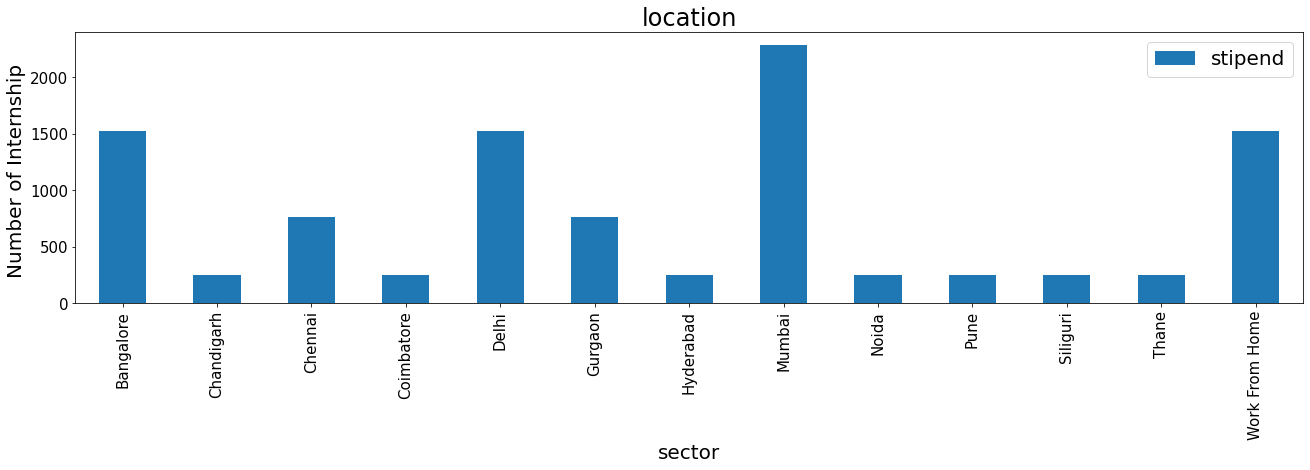

In [1015]:
df2.plot(kind='bar', title='location',ylabel='Number of Internship ', xlabel='sector', figsize=(22, 5))
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)
plt.rc('font', size=20) 

# Highest number of internships are from Mumbai followed by WFH.

In [1000]:
df3 = df1.groupby('intern_type')['stipend'].count().reset_index()
df3

,intern_type,stipend
0,Internship,8890
1,Internship with job offer,1270


In [1001]:
df3.set_index(['intern_type'],inplace = True)
df3

,stipend
intern_type,
Internship,8890
Internship with job offer,1270


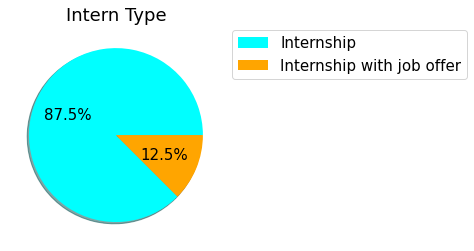

In [1011]:
colors = ['cyan','orange']
ax = df3["stipend"].plot(kind="pie",y = '' ,autopct='%1.1f%%', shadow=True, colors=colors, legend=True, title='Intern Type', ylabel='', labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()
plt.rc('font', size=15) 


## 87% traffic on internshala is without job offer or is temporary which is reasonable as they provide a platform for students to learn.

In [1004]:
df4 = df1.groupby('title').count()

In [1005]:
df5 = df4.iloc[: , :1] # drops 1st column of df


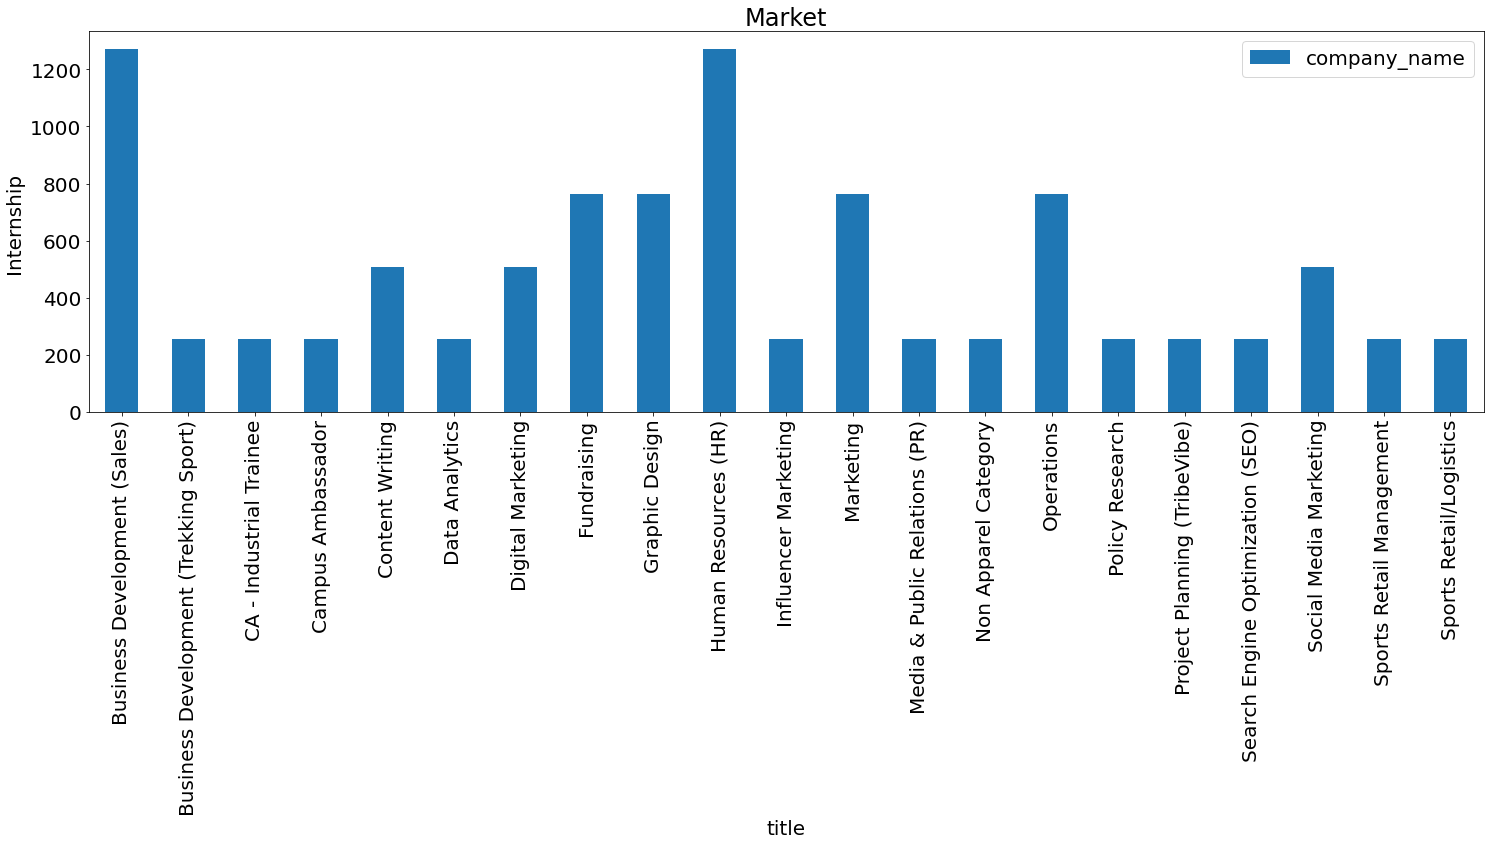

In [1022]:
df5.plot(kind='bar', title='Market',ylabel='Internship ', xlabel='title', figsize=(25, 7))
plt.rc('font', size=20) 
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)


## Most of the internships are from Business Development(sales) and Human resource on internshala platform so one pursuing these 2 fields can easily get internship.

In [1023]:
df.to_csv('housing.csv')